In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pylab
from IPython.display import display, HTML  # To display correct tables
from pprint import pprint
import py
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (16.0, 8.0)
cp = sns.color_palette()

def figsize(width=16, height=8):
    pylab.rcParams['figure.figsize'] = (width, height)


In [3]:
import os
os.chdir("..")

In [4]:
from src import emd

In [5]:
np.random.normal(10)

10.611364711104178

In [18]:
from scipy.stats import wasserstein_distance

np.random.seed(1)
h1 = np.random.normal(0, size=10)
w1 = np.abs(np.random.normal(10, size=10))
w1 = w1 / np.sum(w1)
h2 = np.random.normal(0, size=10)
w2 = np.abs(np.random.normal(10, size=10))
w2 = w2 / np.sum(w2)

In [22]:
%%timeit
res, dist = emd.earth_mover_distance(h1, h2, w1, w2)

33.1 ms ± 382 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
print(dist)

0.4160379580568753


In [20]:
wasserstein_distance(h1, h2, w1, w2)

0.41603795805687555

## Complexity study

On va étudier la complexité en fonction de n + m

Le pb est que linprog trouve pas de point faisable à partir de environ ~80 en dimension odg de n + m donc c'est difficile d'évaluer

Par ailleurs la performance de la fonction de wasserstein de scipy a l'air linéaire ce qui correspont pas vraiment à nos attentes (même si linéaire c'est un polynôme de degré 1 c'est pas ouf)

In [24]:
from time import time

In [95]:

from collections import defaultdict
perfs = defaultdict(list)

for n in np.logspace(1, 4, num=100):
    for m in np.logspace(1, 4, num=100):
        n, m = int(n), int(m)
        start = time()
        # compute
        h1 = np.abs(np.random.normal(0, size=n))
        w1 = np.abs(np.random.normal(10, size=n))
        w1 = w1 / np.sum(w1)
        h2 = np.abs(np.random.normal(0, size=m))
        w2 = np.abs(np.random.normal(10, size=m))
        w2 = w2 / np.sum(w2)
        emd.earth_mover_distance(h1, h2, w1, w2)
        # Register time elapsed
        elapsed = time() - start
        perfs[n + m].append(elapsed)
print()

ValueError: Scalar operands are not allowed, use '*' instead

In [84]:
from collections import defaultdict
perfs = defaultdict(list)

for n in np.logspace(0, 5, num=100):
    for m in np.logspace(0, 5, num=100):
        n, m = int(n), int(m)
        start = time()
        # compute
        h1 = np.random.normal(0, size=n)
        w1 = np.abs(np.random.normal(10, size=n))
        w1 = w1 / np.sum(w1)
        h2 = np.random.normal(0, size=m)
        w2 = np.abs(np.random.normal(10, size=m))
        w2 = w2 / np.sum(w2)
        wasserstein_distance(h1, h2, w1, w2)
        # Register time elapsed
        elapsed = time() - start
        perfs[n + m].append(elapsed)
print()

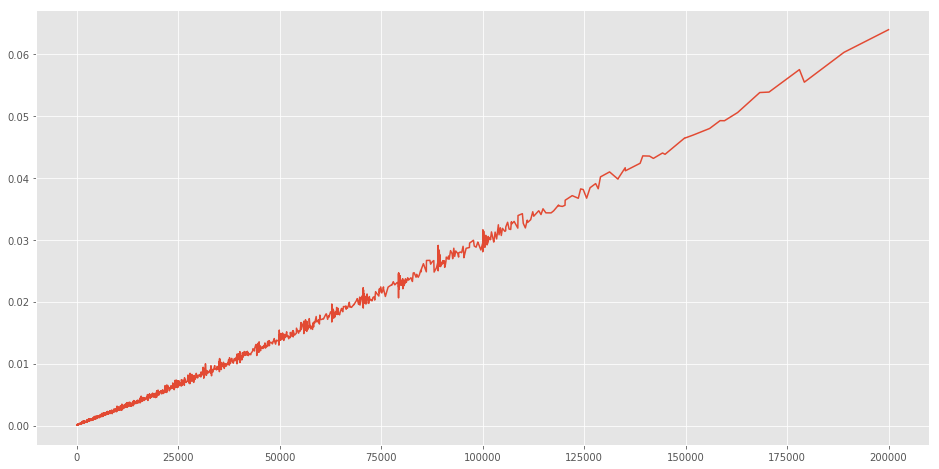

In [91]:
keys = sorted(list(perfs.keys()))
perfs = [np.mean(perfs[k]) for k in keys]

plt.plot(keys, perfs)

In [97]:
from collections import defaultdict
perfs = defaultdict(list)

for n in range(1, 30):
    for m in range(1, 30):
        n, m = int(n), int(m)
        start = time()
        # compute
        h1 = np.abs(np.random.normal(0, size=n))
        w1 = np.abs(np.random.normal(10, size=n))
        w1 = w1 / np.sum(w1)
        h2 = np.abs(np.random.normal(0, size=m))
        w2 = np.abs(np.random.normal(10, size=m))
        w2 = w2 / np.sum(w2)
        emd.earth_mover_distance(h1, h2, w1, w2)
        # Register time elapsed
        elapsed = time() - start
        perfs[n + m].append(elapsed)
print()

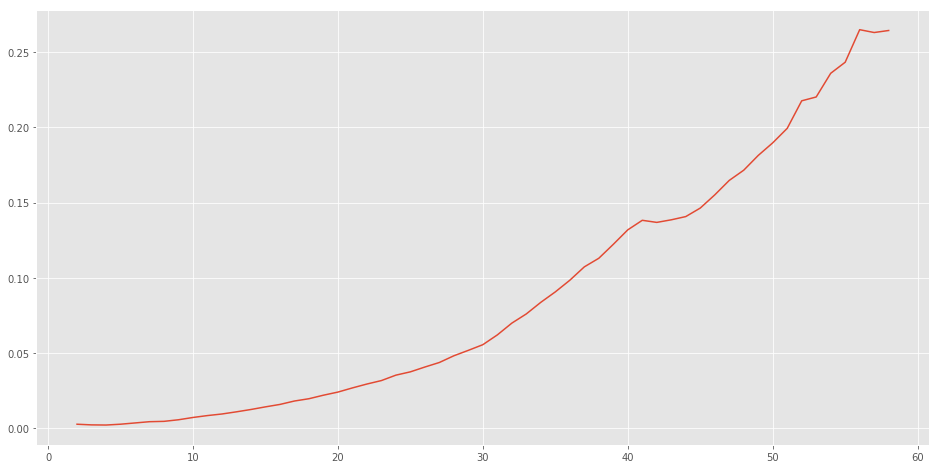

In [99]:
keys = sorted(list(perfs.keys()))
plot_perfs = [np.mean(perfs[k]) for k in keys]

plt.plot(keys, plot_perfs)

Bon on a un problème en grande dimension mais j'suis plutôt pour l'ignorer et montrer qu'on a une relation polynomiale déjà sur ce qu'on a

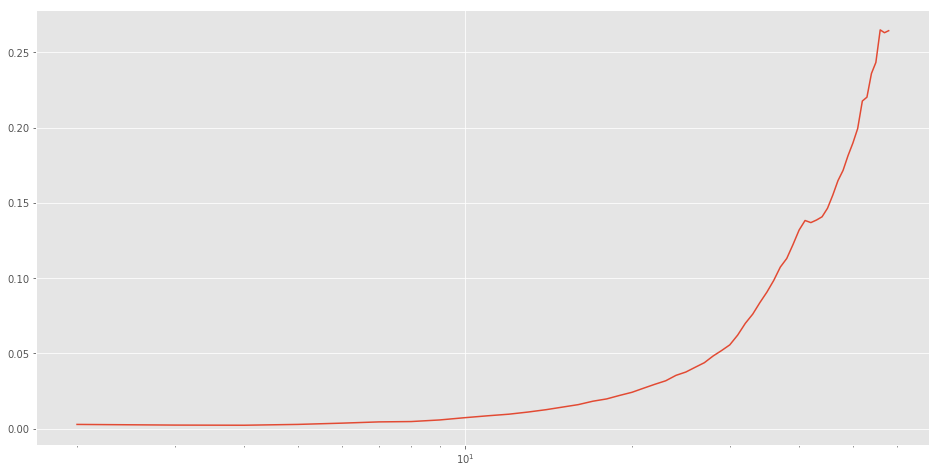

In [104]:
pylab.xscale("log")
plt.plot(keys, plot_perfs)
plt.show()

ça a pas franchement l'air de trop marcher on devrait avoir une ligne en log scale